In [3]:
import networkx as nx

G = nx.DiGraph()

G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')

list(G.nodes())

['Alice', 'Bob', 'Chuck']

In [4]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')

list(G.edges())

[('Alice', 'Bob'), ('Alice', 'Chuck'), ('Bob', 'Alice'), ('Bob', 'Chuck')]

Matplotlib is building the font cache; this may take a moment.


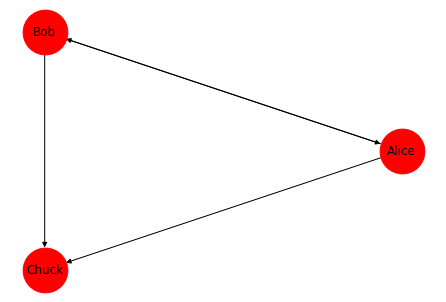

In [5]:
nx.draw_circular(G,
node_color='red',
node_size=2000,
with_labels=True)

In [6]:
positions = dict(Albany=(-74, 43),
Boston=(-71, 42),
NYC=(-74, 41),
Philly=(-75, 40))

G2 = nx.Graph()

G2.add_nodes_from(positions)

In [7]:
drive_times = {('Albany', 'Boston'): 3,
                ('Albany', 'NYC'): 4,
                ('Boston', 'NYC'): 4,
                ('NYC', 'Philly'): 2}

G2.add_edges_from(drive_times)

{('Albany', 'Boston'): Text(-72.5, 42.5, '3'),
 ('Albany', 'NYC'): Text(-74.0, 42.0, '4'),
 ('Boston', 'NYC'): Text(-72.5, 41.5, '4'),
 ('NYC', 'Philly'): Text(-74.5, 40.5, '2')}

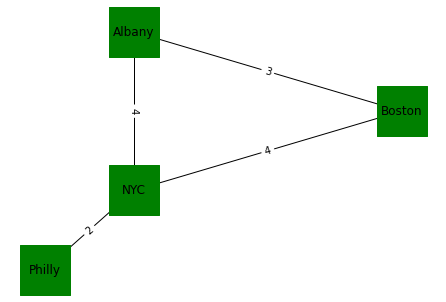

In [8]:
nx.draw(G2, positions,
node_color='green',
node_shape='s',
node_size=2500,
with_labels=True)

nx.draw_networkx_edge_labels(G2, positions,
                                edge_labels=drive_times)

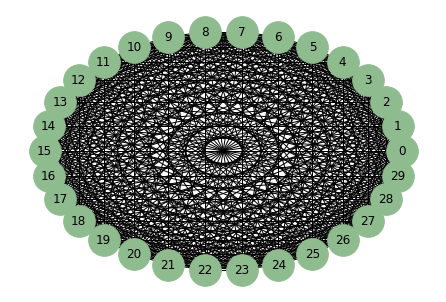

In [18]:
import networkx as nx

def all_pairs(nodes):
    for i, u in enumerate(nodes):
        for j, v in enumerate(nodes):
            if i>j:
                yield u,v



def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

complete = make_complete_graph(30)

nx.draw_circular(complete,
                 node_color='darkseagreen',
                 node_size=1000,
                 with_labels=True)

In [10]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]

    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    
    return seen


def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)


import numpy as np
def flip(p):
    return np.random.random() < p


def random_pairs(nodes, p):
    for edge in all_pairs(nodes):
        if flip(p):
            yield edge


def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G



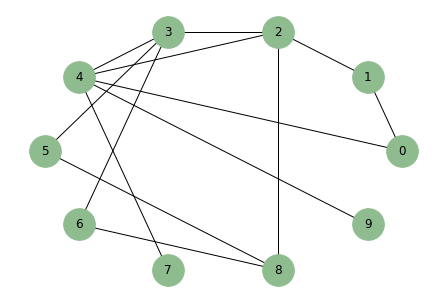

In [11]:
random_graph = make_random_graph(10, 0.3)

nx.draw_circular(random_graph,
                 node_color='darkseagreen',
                 node_size=1000,
                 with_labels=True)

In [12]:
def prob_connected(n, p, iters=100):
    tf = [is_connected(make_random_graph(n, p)) for i in range(iters)]
    return np.mean(tf)


prob_connected(10, 0.8, iters=10000)

1.0

In [13]:
n = 10
ps = np.logspace(-2.5, 0, 40)
ys = [prob_connected(n, p) for p in ps]
ys

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.01,
 0.03,
 0.16,
 0.21,
 0.33,
 0.49,
 0.7,
 0.81,
 0.93,
 0.97,
 0.99,
 1.0,
 1.0,
 1.0,
 1.0]